In [182]:
import numpy as np
import random
import string
import matplotlib.pyplot as plt
% matplotlib inline

In [183]:
def initialize_classes(k, points):
    """
    This function takes in the number of classes,k, you want
    and it takes in the array of points, points, and returns a dictionary
    d[point] = class, where the class is assigned randomly with the restriction
    being at least one point for each class and k < number of points
    """
    d={}
    init_classes = []
    num_pnts = len(points)
    if k >= num_pnts:
        return 'k must be less than ' + str(num_pnts)
    while len(set(init_classes)) < k:
        init_classes = []
        for i in range(num_pnts):
            init_classes.append(random.choice(string.ascii_letters[0:k]))
    for c in init_classes:
        indices = [i for i, x in enumerate(init_classes) if x == c]
        for i in indices:
            d[tuple(points[i])] = c
    return d

In [184]:
def closest_cluster(d):
    """
    This function takes in the dictionary, d, of point,class pairs,
    computes each cluster center, and re-assigns each point to the class
    whose center it is closest to and returns the updated dictionary
    """
    labels = set(d.values())
    cluster_centers = {}
    new_d = {}
    for label in labels:
        keys = [np.array(i) for i,x in d.items() if x==label]
        center = np.mean(keys, axis=0)
        cluster_centers[label] = center
    for point in d.keys():
        distances = []
        for k,v in cluster_centers.items():
            dist = np.dot(np.array(point)-v, np.array(point)-v)
            distances.append((dist, k))
        closest_cluster = min(distances)[1]
        new_d[point] = closest_cluster
    return new_d

In [185]:
def k_means(k, points):
    """
    This function takes in the number of classes,k, you want
    and it takes in the array of points, points, and runs closest_cluster
    until no more changes take place
    """
    d = initialize_classes(k, points)
    old_d = {}
    while len({k: old_d[k] for k in old_d if k in d and old_d[k] == d[k]}) != len(points):
        old_d = d
        d = closest_cluster(d)
    return d

In [186]:
k = 3 # We want three classes
points = np.array([[1,1], [10,10],[10,1],[10.5,2],[11,1],[1.5,1.5],[2,1.3],[10.5,10.8],[11,11],[11.5,11.5],[10.3,10.3]])

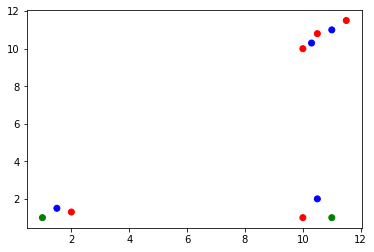

In [214]:
d = initialize_classes(k, points)
color_dict = {'a':'red','b':'blue','c':'green'}
plt.scatter(*zip(*d.keys()), color=[color_dict[i] for i in d.values()])
# At first, each point has been assigned a random class label

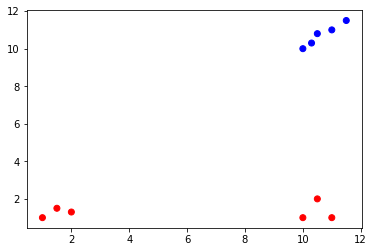

In [215]:
d = k_means(k, points)
color_dict = {'a':'red','b':'blue','c':'green'}
plt.scatter(*zip(*d.keys()), color=[color_dict[i] for i in d.values()])
# Depending on how class labels were first distributed, you might get different results in the end.
# Here, you'll see that the algorithm found two classes, one at the top, and one at the bottom.
# Not exactly what you'd expect

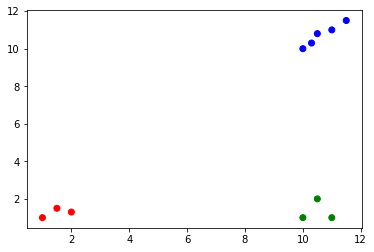

In [216]:
d = k_means(k, points)
color_dict = {'a':'red','b':'blue','c':'green'}
plt.scatter(*zip(*d.keys()), color=[color_dict[i] for i in d.values()])
# A different random class initialization has led to and end result with three class labels